In [28]:
from sys import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pandas as pd
import numpy as np
import seaborn as sns


In [29]:

if platform == "darwin": # macOS
    rc("font", family="AppleGothic")
    plt.rcParams["axes.unicode_minus"] = False
else:
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False


In [30]:
df = pd.read_csv("./locker data.csv")

In [31]:
def show(df, title, start=0, end=53776):
    fig = plt.figure(figsize=(10, 12))
    gs = fig.add_gridspec(4, hspace=0)
    axs = gs.subplots(sharex=True, sharey=False)
    fig.suptitle(title)

    for ax, i in zip(axs, ("SSO", "FSR", "LIG", "HAL")):
        ax.plot(df.loc[start:end, i])
        ax.legend([i])
    for ax in axs:
        ax.label_outer()


# Raw Layer

In [32]:
df["AddDt"] = pd.to_datetime(df["AddDt"])

In [33]:
df = df[df["AddDt"] > "2021-07-26"]

In [34]:
df = df.iloc[:, [1, 3, 4, 5, 6]]

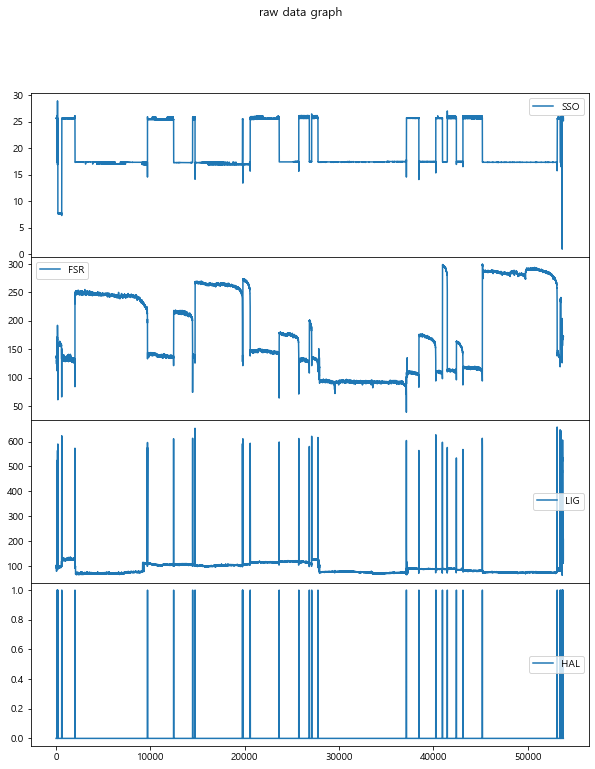

In [35]:
show(df, "raw data graph")

# Feature Layer

In [36]:
feature_df = df.copy()

## 조도센서
- 빈도수의 최고점 다음으로 0이 되는 수를 threshold로 잡아 디지털 신호로 변환

<AxesSubplot:>

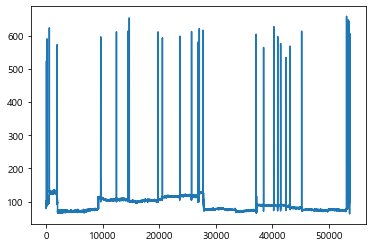

In [37]:
feature_df["LIG"].plot()

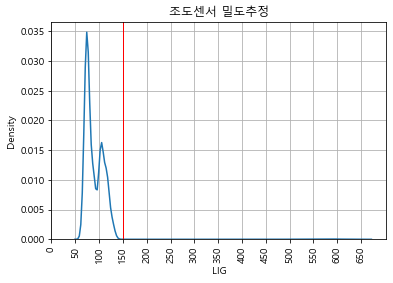

In [40]:
sns.kdeplot(feature_df['LIG'])
plt.grid()
tik = np.arange(0, 700, 50)
plt.title("조도센서 밀도추정")
_ = plt.xticks(ticks=tik, labels=tik, rotation=90)
plt.axvline(x=150, linewidth=1, color='r')

In [41]:
feature_df.loc[feature_df["LIG"] < 150, "LIG"] = 0
feature_df.loc[feature_df["LIG"] >= 150, "LIG"] = 1

<AxesSubplot:>

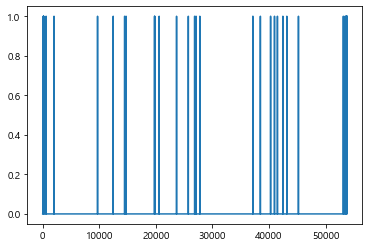

In [42]:
feature_df["LIG"].plot()

## 초음파센서
- 25와 17.5 사이의 값인 21.25를 기준으로 함

<AxesSubplot:>

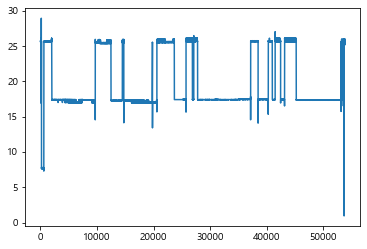

In [43]:
feature_df["SSO"].plot()

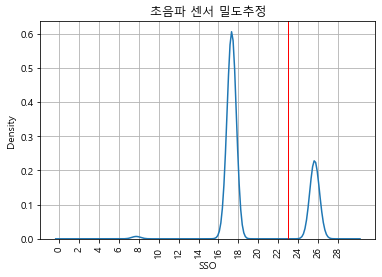

In [45]:
sns.kdeplot(feature_df['SSO'])
plt.grid()
tik = np.arange(0, 30, 2)
plt.title("초음파 센서 밀도추정")
_ = plt.xticks(ticks=tik, labels=tik, rotation=90)
plt.axvline(x=23, linewidth=1, color='r')


In [24]:
feature_df.loc[feature_df["SSO"] < 23, "SSO"] = 1
feature_df.loc[feature_df["SSO"] >= 23, "SSO"] = 0

<AxesSubplot:>

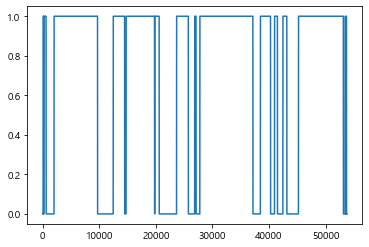

In [25]:
feature_df["SSO"].plot()

## 압력센서
- 값의 변동폭이 너무 커서 threshold값을 책정할 수 없다.
- 일단 테스트단계로 170

<AxesSubplot:>

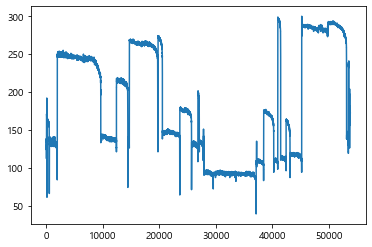

In [154]:
feature_df["FSR"].plot()

In [155]:
feature_df.loc[feature_df["FSR"] < 160, "FSR"] = 0
feature_df.loc[feature_df["FSR"] >= 160, "FSR"] = 1


<AxesSubplot:>

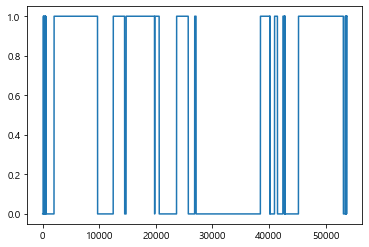

In [156]:
feature_df["FSR"].plot()

## 홀 센서 (자기 센서)
- 기존의 디지털 신호 그대로 차용

<AxesSubplot:>

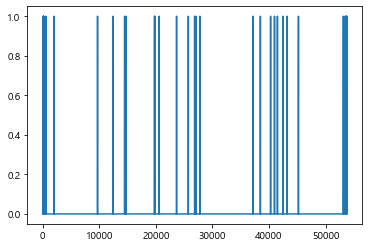

In [157]:
feature_df["HAL"].plot()

## 디지털신호 확인

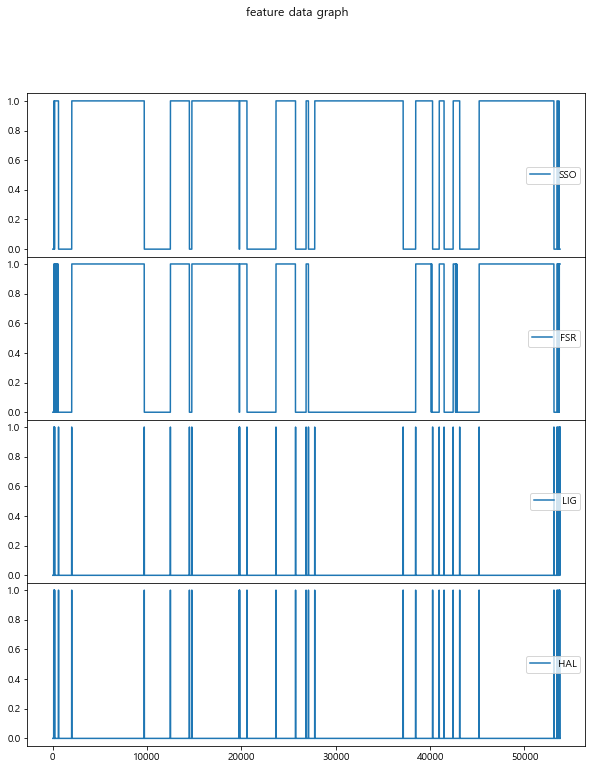

In [158]:
show(feature_df, "feature data graph")

## 조도센서와 자기센서 혼합

- 조도센서와 자기센서는 값이 매우 유사하다.

<AxesSubplot:>

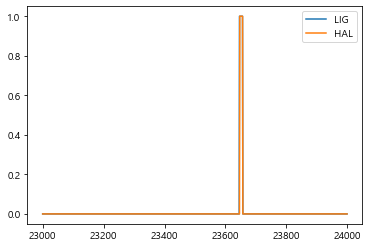

In [159]:
feature_df.iloc[23000:24000, [3, 4]].plot()


## 압력센서와 초음파센서의 혼합 그래프

압력센서와 초음파센서의 값은 항상 같아야 한다.

인덱스가 `30000`근처에는 데이터가 겹쳐있는 걸로 보아 압력센서간 문제가 발생한 것으로 보인다.

<AxesSubplot:>

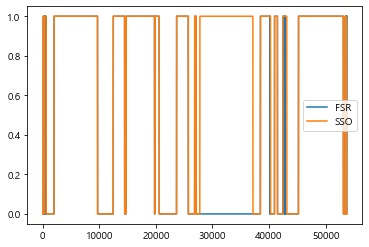

In [160]:
feature_df.loc[:, ["FSR", "SSO"]].plot()

## 조도센서와 초음파센서 혼합 그래프

<AxesSubplot:>

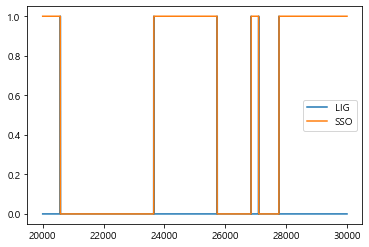

In [161]:
feature_df.loc[20000:30000, ["LIG", "SSO"]].plot()


In [162]:
test_df = pd.read_csv("./senval_new4.csv")


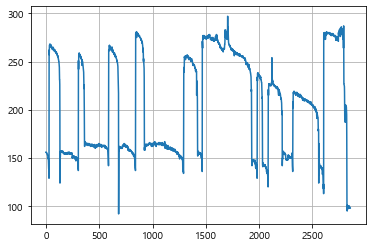

In [163]:
test_df["FSR"].plot()
plt.grid()

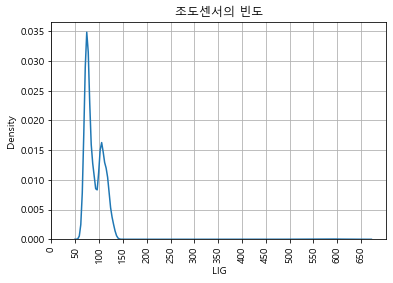

In [164]:
sns.kdeplot(df['LIG'])
plt.grid()
tik = np.arange(0, 700, 50)
plt.title("조도센서의 빈도")
_ = plt.xticks(ticks=tik, labels=tik, rotation=90)
